<a href="https://colab.research.google.com/github/namozhdehi/KSR/blob/main/2_Ecommerce_PreProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. PREPROCESSING

- Find out and impute, if we have missing values in the categorical features.
- Remove the features which do not add much information
- Choose an Encoding scheme to convert categorical feature into numeric.

Data Description:

- **InvoiceNo:** A 6-digit integral number uniquely assigned to each transaction.
- **StockCode:**	Product (item) code
- **Description:** 	Product (item) name
- **Quantity:** 	The quantities of each product (item) per transaction
- **InvoiceDate:**	The day when each transaction was generated
- **UnitPrice:**	Unit price (Product price per unit)
- **CustomerID:**	Customer number (Unique ID assigned to each customer)
- **Country:**	Country name (The name of the country where each customer resides)


## 2.1. PREPROCESSING: CATEGORICAL FEATURES

In [1]:
import numpy as np
import pandas as pd
#! pip install category_encoders
import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Ecommerce.csv', encoding='latin-1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom,NaN


In [3]:
df.shape

(541909, 9)

In [4]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Unnamed: 8'],
      dtype='object')

In [5]:
df = df.drop(columns=['Unnamed: 8'])
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,17850.0,United Kingdom


In [6]:
# check for the null values in the categorical features
df[['InvoiceNo', 'StockCode', 'Description', 'CustomerID', 'Country']].isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
CustomerID,135080
Country,0


CustomerID and Description has some Null values.

### 2.1.1. Description

In [7]:
df[df['Description'].isna()].sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,29-Nov-16,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,5-Dec-17,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,5-Dec-17,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,5-Dec-17,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,6-Dec-17,0.0,NaN,United Kingdom


In [8]:
df[df['StockCode'] == '22139']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
106,536381,22139,RETROSPOT TEA SET CERAMIC 11 PC,23,29-Nov-16,4.25,15311.0,United Kingdom
622,536414,22139,NaN,56,29-Nov-16,0.00,NaN,United Kingdom
6392,536942,22139,amazon,15,1-Dec-16,0.00,NaN,United Kingdom
6885,536982,22139,RETROSPOT TEA SET CERAMIC 11 PC,10,1-Dec-16,11.02,NaN,United Kingdom
7203,537011,22139,NaN,-5,1-Dec-16,0.00,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
538411,581405,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,6-Dec-17,4.95,13521.0,United Kingdom
539531,581439,22139,RETROSPOT TEA SET CERAMIC 11 PC,1,6-Dec-17,10.79,NaN,United Kingdom
540441,581486,22139,RETROSPOT TEA SET CERAMIC 11 PC,6,7-Dec-17,4.95,17001.0,United Kingdom
541387,581498,22139,RETROSPOT TEA SET CERAMIC 11 PC,2,7-Dec-17,10.79,NaN,United Kingdom


In [9]:
# Create a mapping of StockCode to the first non-null Description
stockcode_description_map = df.dropna(subset=['Description']).groupby('StockCode')['Description'].first()

# Replace null Description with the corresponding value from the mapping
df['Description'] = df.apply(
    lambda row: stockcode_description_map.get(row['StockCode'], row['Description']) if pd.isnull(row['Description']) else row['Description'],
    axis=1
)

# Display the updated dataframe
df[df['Description'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
2024,536552,20950,NaN,1,29-Nov-16,0.0,NaN,United Kingdom
2026,536554,84670,NaN,23,29-Nov-16,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
280754,561498,21610,NaN,-14,25-Jul-17,0.0,NaN,United Kingdom
281615,561555,37477B,NaN,-11,26-Jul-17,0.0,NaN,United Kingdom
281616,561557,37477C,NaN,-31,26-Jul-17,0.0,NaN,United Kingdom
346849,567207,35592T,NaN,4,17-Sep-17,0.0,NaN,United Kingdom


In [10]:
df[df['StockCode'] == '21134']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1970,536545,21134,NaN,1,29-Nov-16,0.0,NaN,United Kingdom


In [11]:
# Replace NaN values in Description with 'Unknown'
df['Description'] = df['Description'].fillna('Unknown')

df['Description'].isna().sum()

0

In [12]:
# Convert date field to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# day of year
df['Invoice_year'] = df['InvoiceDate'].dt.year

# month of year
df['Invoice_month'] = df['InvoiceDate'].dt.month

# day of month
df['Invoice_DoM'] = df['InvoiceDate'].dt.day

# day of week
df['Invoice_day'] = df['InvoiceDate'].dt.dayofweek

# day of the week name
df['Invoice_DoW'] = df['InvoiceDate'].dt.day_name()

# month name
df['Invoice_monthN'] = df['InvoiceDate'].dt.month_name()
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,17850.0,United Kingdom,2016,11,29,1,Tuesday,November
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,17850.0,United Kingdom,2016,11,29,1,Tuesday,November
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,17850.0,United Kingdom,2016,11,29,1,Tuesday,November


### 2.1.2. CustomerID

In [13]:
df['CustomerID'].isnull().sum()

135080

In [14]:
df['CustomerID'].value_counts()

,count
CustomerID,
17841.0,7983
14911.0,5903
14096.0,5128
12748.0,4642
14606.0,2782
...,...
15070.0,1
15753.0,1
17065.0,1


In [15]:
df[df['CustomerID'].isna()].sort_values('InvoiceNo')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2016-11-29,0.00,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1802,536544,90129B,TURQUOISE GLASS TASSLE BAG CHARM,1,2016-11-29,1.66,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1801,536544,90129A,PINK GLASS TASSLE BAG CHARM,2,2016-11-29,1.66,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1800,536544,90120C,GREEN MURANO TWIST BRACELET,1,2016-11-29,4.24,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1799,536544,90116,FRUIT SALAD BAG CHARM,1,2016-11-29,2.51,NaN,United Kingdom,2016,11,29,1,Tuesday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492207,C578097,22112,CHOCOLATE HOT WATER BOTTLE,-48,2017-11-20,4.25,NaN,United Kingdom,2017,11,20,0,Monday,November
514984,C579757,47469,ASSORTED SHAPES PHOTO CLIP SILVER,-24,2017-11-28,0.65,NaN,United Kingdom,2017,11,28,1,Tuesday,November
516454,C579907,22169,FAMILY ALBUM WHITE PICTURE FRAME,-2,2017-11-29,7.65,NaN,EIRE,2017,11,29,2,Wednesday,November
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2017-12-03,11586.50,NaN,United Kingdom,2017,12,3,6,Sunday,December


In [16]:
df_In536544 = df[df['InvoiceNo'] == '536544']
df_In536544[~df_In536544['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN


In [17]:
missing_customer_data = df[df['CustomerID'].isnull()]
missing_customer_data['InvoiceNo'].str.startswith('C').value_counts()

,count
InvoiceNo,
False,134697
True,383


Some of the missing CustomerID entries seem to be cancellation orders, so we can assign a placeholder like "Cancellation" to keep the data consistent.

In [18]:
df.loc[df['InvoiceNo'].str.startswith('C') & df['CustomerID'].isnull(), 'CustomerID'] = 'Cancellation'
df[df['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
622,536414,22139,RETROSPOT TEA SET CERAMIC 11 PC,56,2016-11-29,0.00,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2016-11-29,2.51,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2016-11-29,2.51,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1445,536544,21786,POLKADOT RAIN HAT,4,2016-11-29,0.85,NaN,United Kingdom,2016,11,29,1,Tuesday,November
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2016-11-29,1.66,NaN,United Kingdom,2016,11,29,1,Tuesday,November
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2017-12-07,4.13,NaN,United Kingdom,2017,12,7,3,Thursday,December
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2017-12-07,4.13,NaN,United Kingdom,2017,12,7,3,Thursday,December
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2017-12-07,4.96,NaN,United Kingdom,2017,12,7,3,Thursday,December
541539,581498,85174,S/4 CACTI CANDLES,1,2017-12-07,10.79,NaN,United Kingdom,2017,12,7,3,Thursday,December


In [19]:
# Replace NaN values in CustomerID with 'Unknown'
df['CustomerID'] = df['CustomerID'].fillna('Unknown')

df['CustomerID'].isna().sum()

0

## 2.1. PREPROCESSING: NUMERICAL FEATURES

### 2.1.1. Quantity

In [20]:
df['Quantity'].isna().sum()

0

In [21]:
df['Quantity'].describe()

,Quantity
count,541909.000000
mean,9.552250
std,218.081158
min,-80995.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [22]:
df_notCancelled = df[~df['InvoiceNo'].str.startswith('C')]
df_notCancelled['Quantity'].describe()

,Quantity
count,532621.000000
mean,10.239972
std,159.593551
min,-9600.000000
25%,1.000000
50%,3.000000
75%,10.000000
max,80995.000000


In [23]:
df_notCancelled[df_notCancelled['Quantity'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
2406,536589,21777,RECIPE BOX WITH METAL HEART,-10,2016-11-29,0.0,Unknown,United Kingdom,2016,11,29,1,Tuesday,November
4347,536764,84952C,MIRROR LOVE BIRD T-LIGHT HOLDER,-38,2016-11-30,0.0,Unknown,United Kingdom,2016,11,30,2,Wednesday,November
7188,536996,22712,CARD DOLLY GIRL,-20,2016-12-01,0.0,Unknown,United Kingdom,2016,12,1,3,Thursday,December
7189,536997,22028,PENNY FARTHING BIRTHDAY CARD,-20,2016-12-01,0.0,Unknown,United Kingdom,2016,12,1,3,Thursday,December
7190,536998,85067,CREAM SWEETHEART WALL CABINET,-6,2016-12-01,0.0,Unknown,United Kingdom,2016,12,1,3,Thursday,December
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535333,581210,23395,check,-26,2017-12-05,0.0,Unknown,United Kingdom,2017,12,5,1,Tuesday,December
535335,581212,22578,lost,-1050,2017-12-05,0.0,Unknown,United Kingdom,2017,12,5,1,Tuesday,December
535336,581213,22576,check,-30,2017-12-05,0.0,Unknown,United Kingdom,2017,12,5,1,Tuesday,December
536908,581226,23090,missing,-338,2017-12-06,0.0,Unknown,United Kingdom,2017,12,6,2,Wednesday,December


In [24]:
print(df['Quantity'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 541909 entries, 0 to 541908
Series name: Quantity
Non-Null Count   Dtype
--------------   -----
541909 non-null  int64
dtypes: int64(1)
memory usage: 4.1 MB
None


### 2.1.2. UnitPrice

In [25]:
df['UnitPrice'].isna().sum()

0

## 2.2.1.Outliers

### 2.2.1 Quantity

<Figure size 800x600 with 0 Axes>

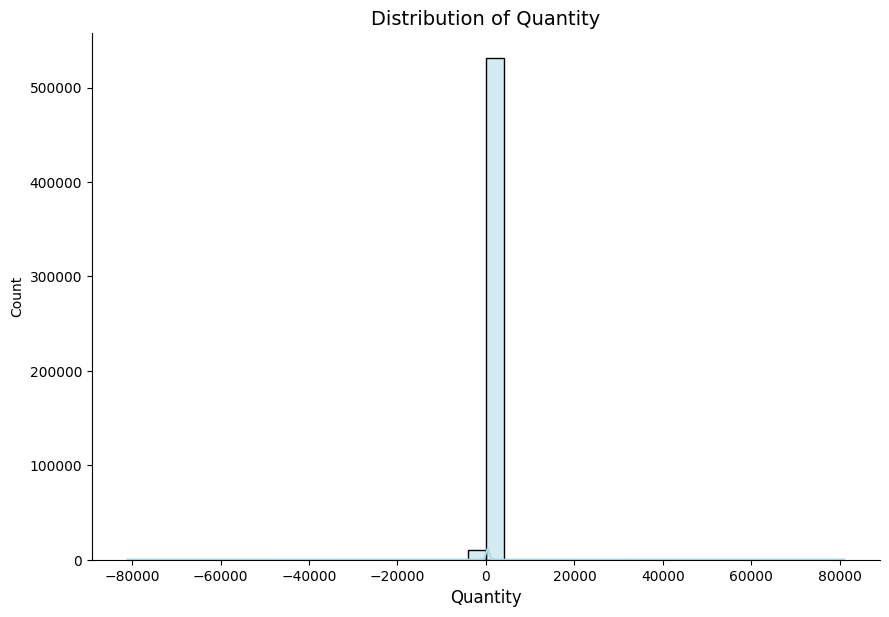

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.displot(df['Quantity'], bins=40, kde=True, color='lightblue', height=6, aspect=1.5)
plt.xlabel('Quantity', fontsize=12)
plt.title('Distribution of Quantity', fontsize=14)
plt.show()

In [27]:
df_nooutlier = df[(df['Quantity'] > 0) & (df['Quantity'] < 20)]

<Figure size 800x600 with 0 Axes>

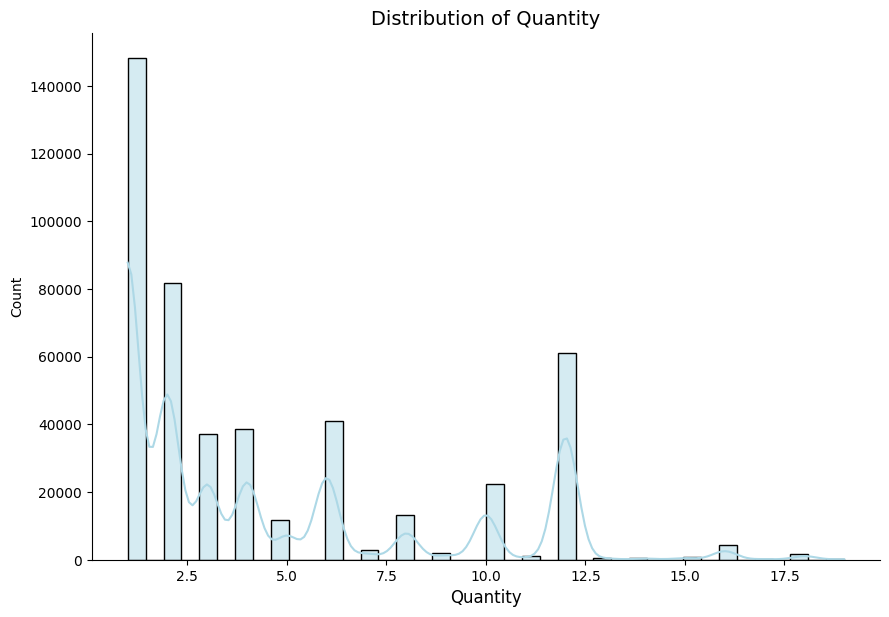

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.displot(df_nooutlier['Quantity'], bins=40, kde=True, color='lightblue', height=6, aspect=1.5)
plt.xlabel('Quantity', fontsize=12)
plt.title('Distribution of Quantity', fontsize=14)
plt.show()

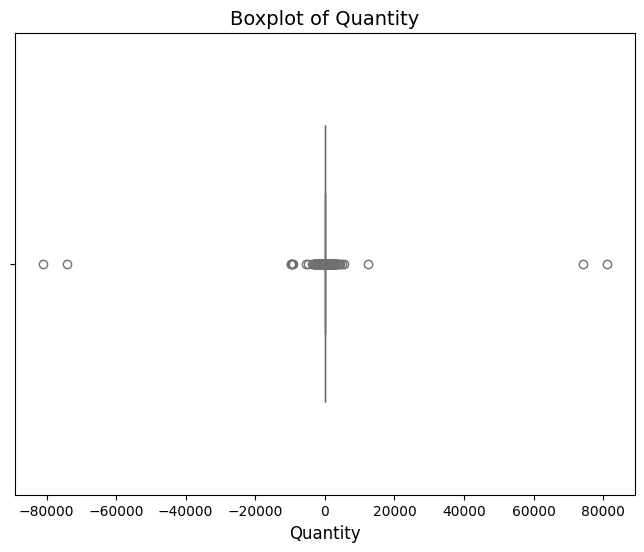

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x=df['Quantity'], color='skyblue', width=0.6)

# Add labels and title
plt.xlabel('Quantity', fontsize=12)
plt.title('Boxplot of Quantity', fontsize=14)

# Show the plot
plt.show()

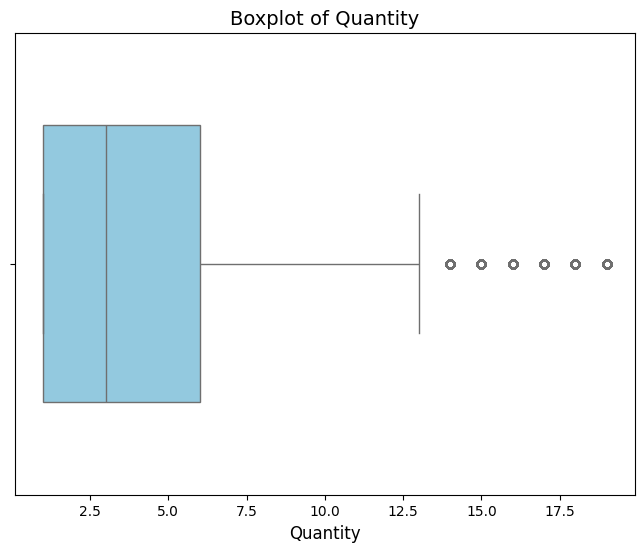

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x=df_nooutlier['Quantity'], color='skyblue', width=0.6)

# Add labels and title
plt.xlabel('Quantity', fontsize=12)
plt.title('Boxplot of Quantity', fontsize=14)

# Show the plot
plt.show()

In [31]:
df[df['Quantity'] > 5000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2017-01-16,1.04,12346.0,United Kingdom,2017,1,16,0,Monday,January
74614,542504,37413,ICON MUG REVOLUTIONARY,5568,2017-01-26,0.00,Unknown,United Kingdom,2017,1,26,3,Thursday,January
502122,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,12540,2017-11-23,0.00,13256.0,United Kingdom,2017,11,23,3,Thursday,November
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2017-12-07,2.08,16446.0,United Kingdom,2017,12,7,3,Thursday,December


In [32]:
df = df[df['Quantity'] < 5000]

### 3.1.2 UnitPrice

<Figure size 800x600 with 0 Axes>

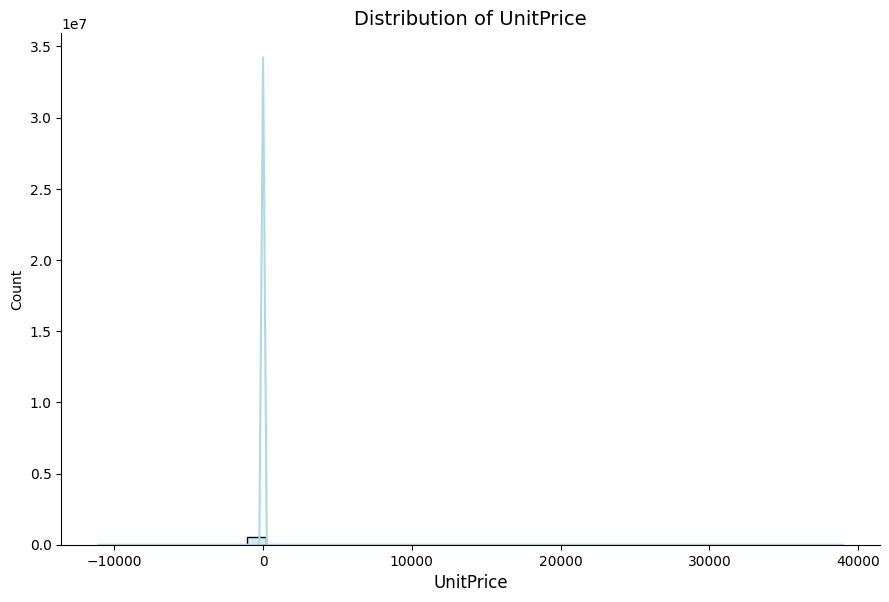

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.displot(df['UnitPrice'], bins=40, kde=True, color='lightblue', height=6, aspect=1.5)
plt.xlabel('UnitPrice', fontsize=12)
plt.title('Distribution of UnitPrice', fontsize=14)
plt.show()

In [34]:
df['UnitPrice'].describe()

,UnitPrice
count,541905.000000
mean,4.611142
std,96.760210
min,-11062.060000
25%,1.250000
50%,2.080000
75%,4.130000
max,38970.000000


In [35]:
df_nooutlier = df[(df['UnitPrice'] > 0) & (df['UnitPrice'] < 100)]

<Figure size 800x600 with 0 Axes>

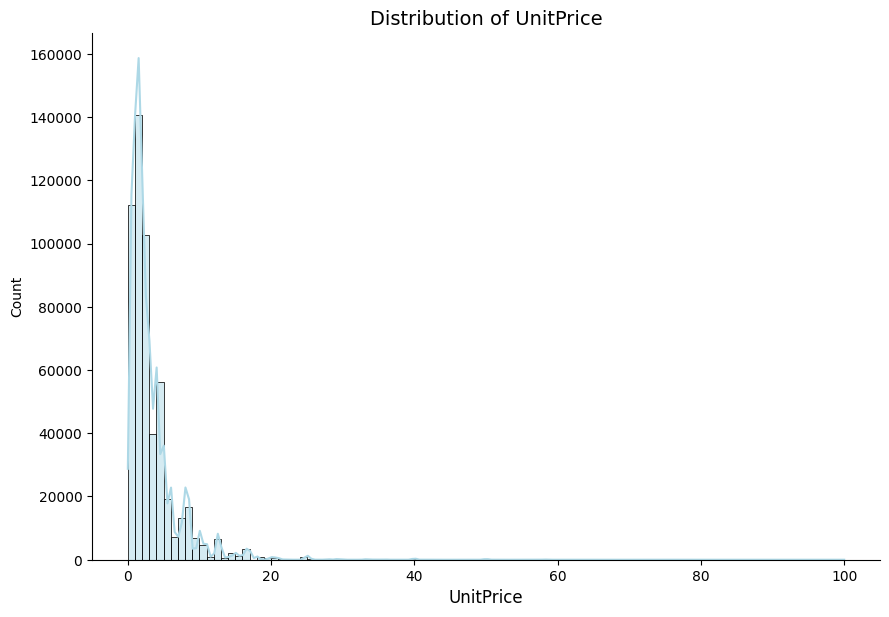

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.displot(df_nooutlier['UnitPrice'], bins=100, kde=True, color='lightblue', height=6, aspect=1.5)
plt.xlabel('UnitPrice', fontsize=12)
plt.title('Distribution of UnitPrice', fontsize=14)
plt.show()

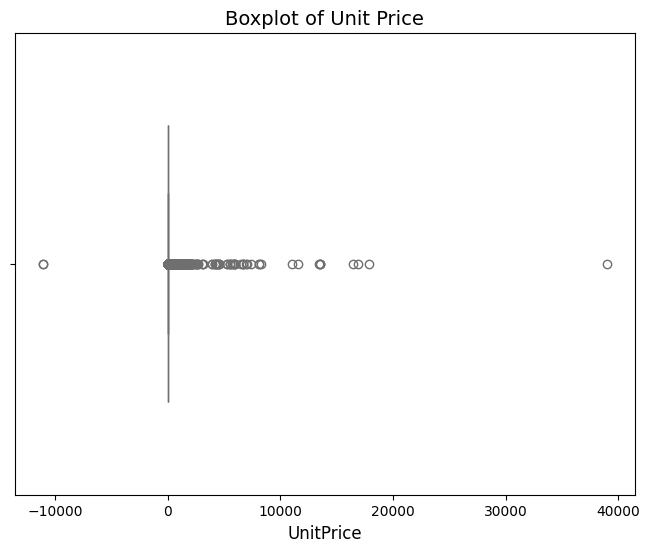

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x=df['UnitPrice'], color='skyblue', width=0.6)

# Add labels and title
plt.xlabel('UnitPrice', fontsize=12)
plt.title('Boxplot of Unit Price', fontsize=14)

# Show the plot
plt.show()

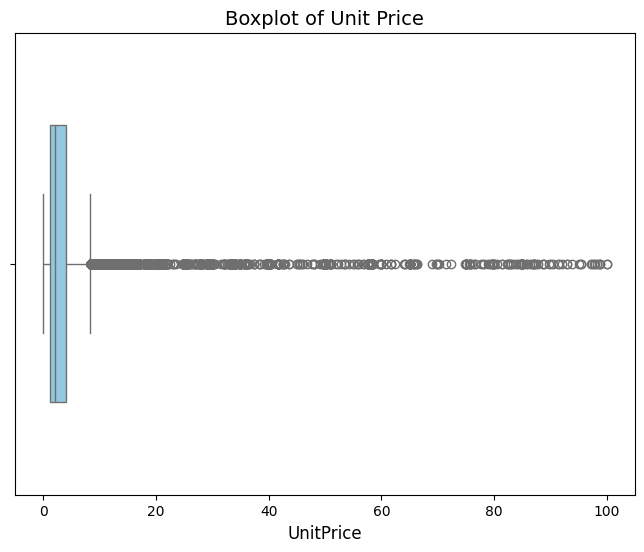

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(8, 6))

# Create the boxplot
sns.boxplot(x=df_nooutlier['UnitPrice'], color='skyblue', width=0.6)

# Add labels and title
plt.xlabel('UnitPrice', fontsize=12)
plt.title('Boxplot of Unit Price', fontsize=14)

# Show the plot
plt.show()

In [39]:
df[df['UnitPrice'] > 10000]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
15016,C537630,AMAZONFEE,AMAZON FEE,-1,2016-12-05,13541.33,Cancellation,United Kingdom,2016,12,5,0,Monday,December
15017,537632,AMAZONFEE,AMAZON FEE,1,2016-12-05,13541.33,Unknown,United Kingdom,2016,12,5,0,Monday,December
16232,C537644,AMAZONFEE,AMAZON FEE,-1,2016-12-05,13474.79,Cancellation,United Kingdom,2016,12,5,0,Monday,December
16356,C537651,AMAZONFEE,AMAZON FEE,-1,2016-12-05,13541.33,Cancellation,United Kingdom,2016,12,5,0,Monday,December
43702,C540117,AMAZONFEE,AMAZON FEE,-1,2017-01-03,16888.02,Cancellation,United Kingdom,2017,1,3,1,Tuesday,January
43703,C540118,AMAZONFEE,AMAZON FEE,-1,2017-01-03,16453.71,Cancellation,United Kingdom,2017,1,3,1,Tuesday,January
222681,C556445,M,Manual,-1,2017-06-08,38970.00,15098.0,United Kingdom,2017,6,8,3,Thursday,June
299982,A563185,B,Adjust bad debt,1,2017-08-10,11062.06,Unknown,United Kingdom,2017,8,10,3,Thursday,August
524601,C580604,AMAZONFEE,AMAZON FEE,-1,2017-12-03,11586.50,Cancellation,United Kingdom,2017,12,3,6,Sunday,December
524602,C580605,AMAZONFEE,AMAZON FEE,-1,2017-12-03,17836.46,Cancellation,United Kingdom,2017,12,3,6,Sunday,December


In [40]:
# Remove outlier from dataset
df = df[df['UnitPrice'] < 10000]

## 2.3. Convert Categorical Variables

In [41]:
from sklearn.preprocessing import LabelEncoder

def label_encode_columns(df, columns):
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        df[column] = encoder.fit_transform(df[column].astype(str))
        encoders[column] = encoder


columns_to_encode = ['StockCode', 'Description', 'Country', 'Invoice_DoW',	'CustomerID','Invoice_monthN']
label_encode_columns(df, columns_to_encode)
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
0,536365,3536,3919,6,2016-11-29,2.55,4047,36,2016,11,29,1,4,9
1,536365,2794,3927,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9
2,536365,3044,913,8,2016-11-29,2.75,4047,36,2016,11,29,1,4,9
3,536365,2985,1910,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9
4,536365,2984,2911,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9


# Scaling

In [42]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering (e.g., aggregated sales, quantity, etc.)
features = ['Quantity', 'UnitPrice']

# Drop NaN values for simplicity
df_cleaned = df[features].dropna()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_cleaned[features])

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_year,Invoice_month,Invoice_DoM,Invoice_day,Invoice_DoW,Invoice_monthN
0,536365,3536,3919,6,2016-11-29,2.55,4047,36,2016,11,29,1,4,9
1,536365,2794,3927,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9
2,536365,3044,913,8,2016-11-29,2.75,4047,36,2016,11,29,1,4,9
3,536365,2985,1910,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9
4,536365,2984,2911,6,2016-11-29,3.39,4047,36,2016,11,29,1,4,9


In [44]:
# Save the DataFrame to a CSV file
df.to_csv('Ecommerce_PreProcessing.csv', index=False)